In [52]:
# import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [53]:
# read NHE spending csv into DF
nhe = "Data Files/Question_4/NHE2016/NHE2016.csv"
nhe_df = pd.read_csv(nhe,header = 1, thousands=',',engine='python')

nhe_df.head()


,Expenditure Amount (Millions),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
1,Out of pocket,12949,13357,14255,15311,16928,18209,18594,18537,20500,...,290000,295184,293723,299742,309973,318330,325189,330068,339315,352537
2,Health Insurance,7497,8236,8999,9892,10971,12023,15673,21109,24379,...,1609250,1695968,1796424,1876922,1950187,2022904,2087804,2228136,2382770,2486842
3,Private Health Insurance,5812,6468,7178,7952,9052,10072,10296,10452,11830,...,776176,802857,832906,864344,898631,928211,946398,999940,1068778,1123372
4,Medicare,-,-,-,-,-,-,1842,4924,6218,...,432751,466971,498859,519787,544679,569634,590163,618889,648808,672093


In [54]:
# extract Total NHE and Total CMS Program rows
nhe_cms_df = nhe_df.loc[[0,35,36],]
nhe_cms_df = nhe_cms_df.set_index("Expenditure Amount (Millions)")

# set to numeric for plotting purposes
nhe_cms_df = nhe_cms_df.apply(pd.to_numeric, errors='ignore')


nhe_cms_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Expenditure Amount (Millions),,,,,,,,,,,,,,,,,,,,,
Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,65923,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
"Total CMS Programs (Medicaid, CHIP and Medicare)",-,-,-,-,-,-,3146,8065,9759,11220,...,767613,821394,884386,928553,963412,1004951,1049032,1128749,1207734,1254525
POPULATION,186,189,192,195,197,200,202,204,206,208,...,301,304,306,309,311,313,316,318,320,322


In [70]:
# Extract series of spending data 1999 - 2016 to compare against opioid deaths
cms_spending = nhe_cms_df.loc['Total CMS Programs (Medicaid, CHIP and Medicare)','1999':'2016']
nhe_spending = nhe_cms_df.loc['Total National Health Expenditures','1999':'2016']
percentage = cms_spending / nhe_spending

percentage.max()

0.37732077611483328

In [56]:
nhe_spending

1999    1277700
2000    1369125
2001    1486158
2002    1628624
2003    1767567
2004    1895724
2005    2023744
2006    2156158
2007    2295307
2008    2399121
2009    2495414
2010    2598823
2011    2689349
2012    2797260
2013    2879008
2014    3026157
2015    3200815
2016    3337248
Name: Total National Health Expenditures, dtype: object

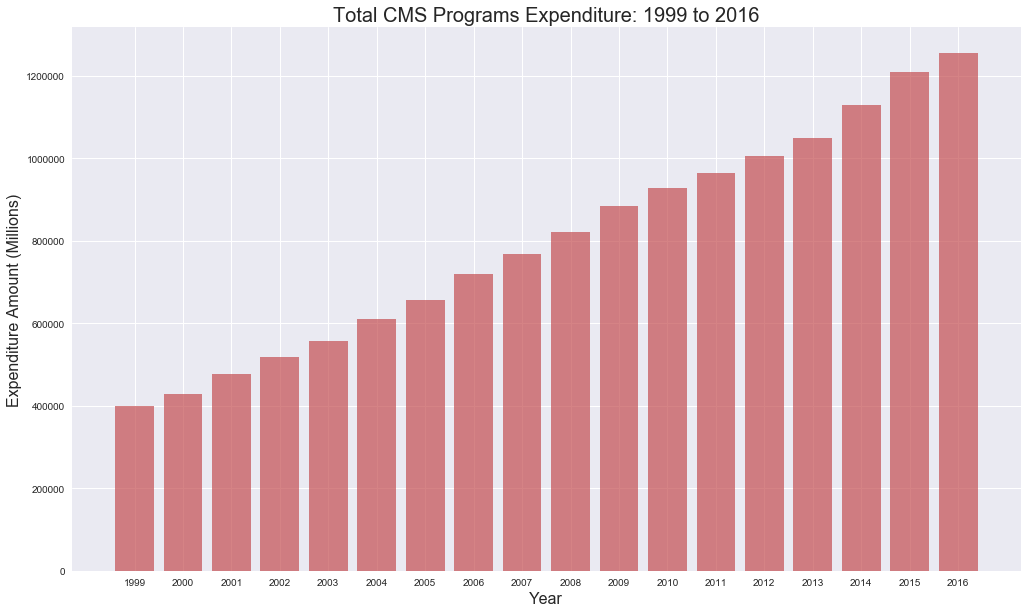

In [76]:
q1ds1_df = pd.read_csv(csv_file, index_col="Year")                           # reads data from file
q1ds1_df.head()
year_min = q1ds1_df.index.min()                                              # finds min and max dates
year_max = q1ds1_df.index.max()


plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditure: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()

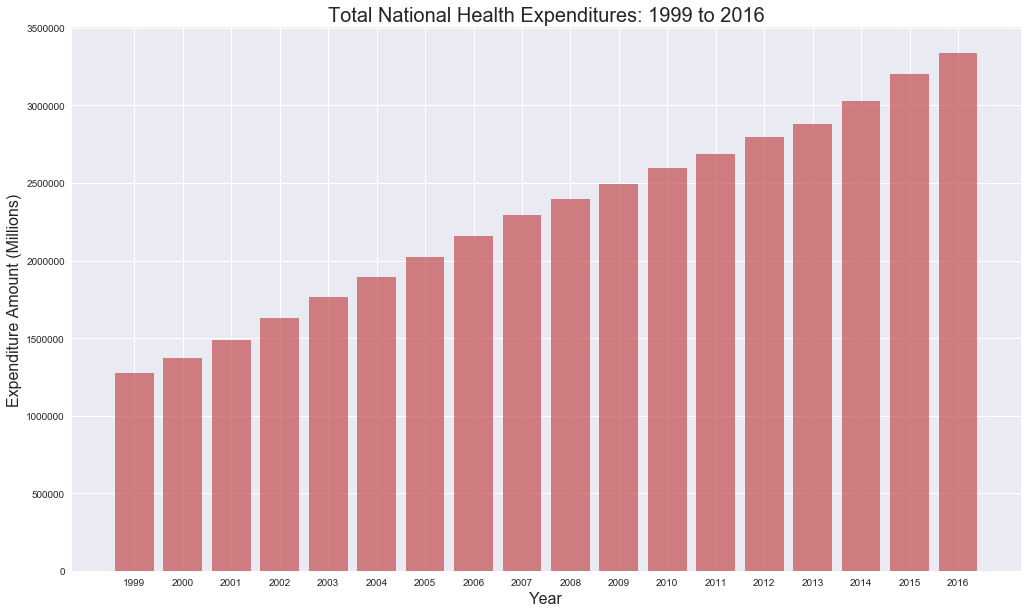

In [72]:


plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total National Health Expenditures: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, nhe_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()

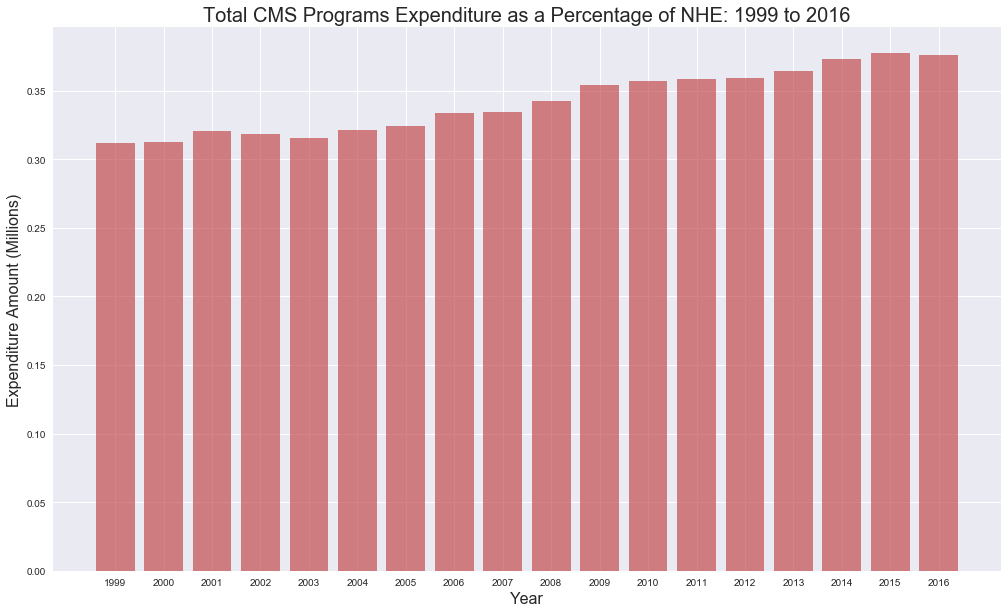

In [75]:
# plot CMS spending as percentage of NHE
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditure as a Percentage of NHE: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending / nhe_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()